In [1]:
import sys, os
sys.path.append(os.path.realpath("../../../"))

In [1]:
%pip install treasury-ml-utils --extra-index-url https://arti.tw.ee/artifactory/api/pypi/pypi-internal/simple

Looking in indexes: https://pypi.org/simple, https://arti.tw.ee/artifactory/api/pypi/pypi-internal/simple
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached slack_sdk-3.37.0-py2.py3-none-any.whl.metadata (15 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-macosx_10_9_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
INFO: pip is looking at multiple versions of s3transfer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.4 MB/s  0:00:01 eta 0:00:01
Using cached

In [2]:
from treasury_ml_utils.snowflake_utils import SnowflakeConnector

snowflake_client = SnowflakeConnector("joshua.choy@transferwise.com")

 pip install snowflake-connector-python[secure-local-storage]


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://transferwise.okta-emea.com/app/snowflake/exk4istpb5gZUyV8u0i7/sso/saml?SAMLRequest=nZJPb%2BIwEMW%2FSuQ9J06yQMECKgpCRWophdBqubnOQA2JnfU4Dfn26%2FBn1T20h71Fzpv5vZk3%2FdtjnnkfYFBqNSBREBIPlNCpVLsBWSdTv0s8tFylPNMKBqQGJLfDPvI8K9iotO9qCb9LQOu5RgpZ82NASqOY5iiRKZ4DMivYavT4wOIgZBwRjHU4cilJUTrWu7UFo7SqqqD6GWizo3EYhjTsUadqJD%2FIJ0TxPaMw2mqhs2vJ0c30BSKiYatBOIUjLC6Fd1KdV%2FAd5e0sQnafJAt%2F8bRKiDe6TjfWCssczArMhxSwXj6cDaBzsEzim1bcDaD0BShreOZHASpdbTN%2BAKHzorSuceC%2B6BZSmumddOuaTQakOMh0v7a%2FuLxP54Xs4RzF%2Bjh%2FDR9nQpSdqdjUz3eT1%2Bd9PRrXey2I93INN27CnSGWMFNNpNY9hXHbj2I%2F6iZhj7U6rN0NwlZnQ7yJi1Qqbk%2BVV9%2FOqcItmEoiBPpguQ858JNNXhT07wQUjoeWRFu8tXebdf3SLUN5QxE1bbIj5%2FNhJytm%2BB9L6dPPDS7HOHf5zCYLnUlRe1Ntcm6%2Fji8KotOLTP3tScog5zIbpakBRBdjlulqbIBbd%2FPWlEDo

 pip install snowflake-connector-python[secure-local-storage]


9.39.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#hourly_data = pd.ExcelFile('data_hourly.xlsx')
#sheet_names =hourly_data.sheet_names

In [33]:
df = snowflake_client.fetch(f"""
    SELECT *, ((BID_OUTRIGHT+OFFER_OUTRIGHT)/2) as mid
    FROM RPT_TREASURY.INT_ASSET_PRICING__FX_QUOTE_SNAPSHOT_HOURLY
    WHERE CCY_PAIR IN ('EURUSD', 'GBPUSD', 'USDCNY', 'USDKRW', 'USDMYR', 'USDINR', 'USDIDR', 'USDPHP', 'USDTWD','USDTHB')
    AND TENOR_CODE = 'SP'
    AND INSTRUMENT_TYPE = 'FXSpot'
    AND PROVIDER = 'BLOOMBERG'
    AND TIMESTAMP BETWEEN '2023-10-01 00:00:00' AND '2025-12-17 23:59:59'  
""")

ccy_df = df.pivot(index='timestamp', columns='ccy_pair', values='mid')
ccy_df.head()

ccy_pair,EURUSD,GBPUSD,USDCNY,USDIDR,USDINR,USDKRW,USDMYR,USDPHP,USDTHB,USDTWD
timestamp,,,,,,,,,,
2023-11-01 00:00:00,NaN,1.21505,7.31645,15885.0,83.2550,1350.60,4.76325,56.73,36.0300,32.4270
2023-11-01 01:00:00,NaN,1.21395,7.31645,15885.0,83.2550,1355.75,4.77225,56.73,36.2225,32.4270
2023-11-01 02:00:00,NaN,1.21365,7.31765,15885.0,83.2550,1358.10,4.77325,56.73,36.2825,32.4880
2023-11-01 03:00:00,NaN,1.21425,7.31870,15947.5,83.2550,1357.50,4.77475,56.73,36.2475,32.4840
2023-11-01 04:00:00,NaN,1.21450,7.31905,15948.0,83.2625,1357.60,4.77400,56.73,36.2600,32.4875


In [34]:
ccy_df.columns

Index(['EURUSD', 'GBPUSD', 'USDCNY', 'USDIDR', 'USDINR', 'USDKRW', 'USDMYR',
       'USDPHP', 'USDTHB', 'USDTWD'],
      dtype='object', name='ccy_pair')

In [35]:
ccy_df

ccy_pair,EURUSD,GBPUSD,USDCNY,USDIDR,USDINR,USDKRW,USDMYR,USDPHP,USDTHB,USDTWD
timestamp,,,,,,,,,,
2023-11-01 00:00:00,NaN,1.21505,7.31645,15885.0,83.25500,1350.60,4.76325,56.73,36.0300,32.4270
2023-11-01 01:00:00,NaN,1.21395,7.31645,15885.0,83.25500,1355.75,4.77225,56.73,36.2225,32.4270
2023-11-01 02:00:00,NaN,1.21365,7.31765,15885.0,83.25500,1358.10,4.77325,56.73,36.2825,32.4880
2023-11-01 03:00:00,NaN,1.21425,7.31870,15947.5,83.25500,1357.50,4.77475,56.73,36.2475,32.4840
2023-11-01 04:00:00,NaN,1.21450,7.31905,15948.0,83.26250,1357.60,4.77400,56.73,36.2600,32.4875
...,...,...,...,...,...,...,...,...,...,...
2025-12-17 19:00:00,1.17440,1.33765,7.04405,16687.5,90.37875,1474.75,4.08850,58.73,31.5000,31.5370
2025-12-17 20:00:00,1.17450,1.33775,7.04405,16687.5,90.37875,1474.75,4.08850,58.73,31.5000,31.5370
2025-12-17 21:00:00,1.17395,1.33785,7.04405,16687.5,90.37875,1474.75,4.08850,58.73,31.5000,31.5370


In [36]:
# missing NA values
ccy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18553 entries, 2023-11-01 00:00:00 to 2025-12-17 23:00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  17912 non-null  float64
 1   GBPUSD  18553 non-null  float64
 2   USDCNY  18553 non-null  float64
 3   USDIDR  18553 non-null  float64
 4   USDINR  18553 non-null  float64
 5   USDKRW  18553 non-null  float64
 6   USDMYR  18553 non-null  float64
 7   USDPHP  18553 non-null  float64
 8   USDTHB  18553 non-null  float64
 9   USDTWD  18553 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [37]:
# rebasing all CCYs to USD

rebased_ccy_df = ccy_df.copy()
rebased_ccy_df['GBPUSD'] = 1 / rebased_ccy_df['GBPUSD']
rebased_ccy_df['EURUSD'] = 1 / rebased_ccy_df['EURUSD']


rebased_ccy_df.rename(columns={
                  'GBPUSD': 'USDGBP',
                  'EURUSD': 'USDEUR',
                  }, inplace=True
                  )

rebased_ccy_df.head()

ccy_pair,USDEUR,USDGBP,USDCNY,USDIDR,USDINR,USDKRW,USDMYR,USDPHP,USDTHB,USDTWD
timestamp,,,,,,,,,,
2023-11-01 00:00:00,NaN,0.823011,7.31645,15885.0,83.2550,1350.60,4.76325,56.73,36.0300,32.4270
2023-11-01 01:00:00,NaN,0.823757,7.31645,15885.0,83.2550,1355.75,4.77225,56.73,36.2225,32.4270
2023-11-01 02:00:00,NaN,0.823961,7.31765,15885.0,83.2550,1358.10,4.77325,56.73,36.2825,32.4880
2023-11-01 03:00:00,NaN,0.823554,7.31870,15947.5,83.2550,1357.50,4.77475,56.73,36.2475,32.4840
2023-11-01 04:00:00,NaN,0.823384,7.31905,15948.0,83.2625,1357.60,4.77400,56.73,36.2600,32.4875


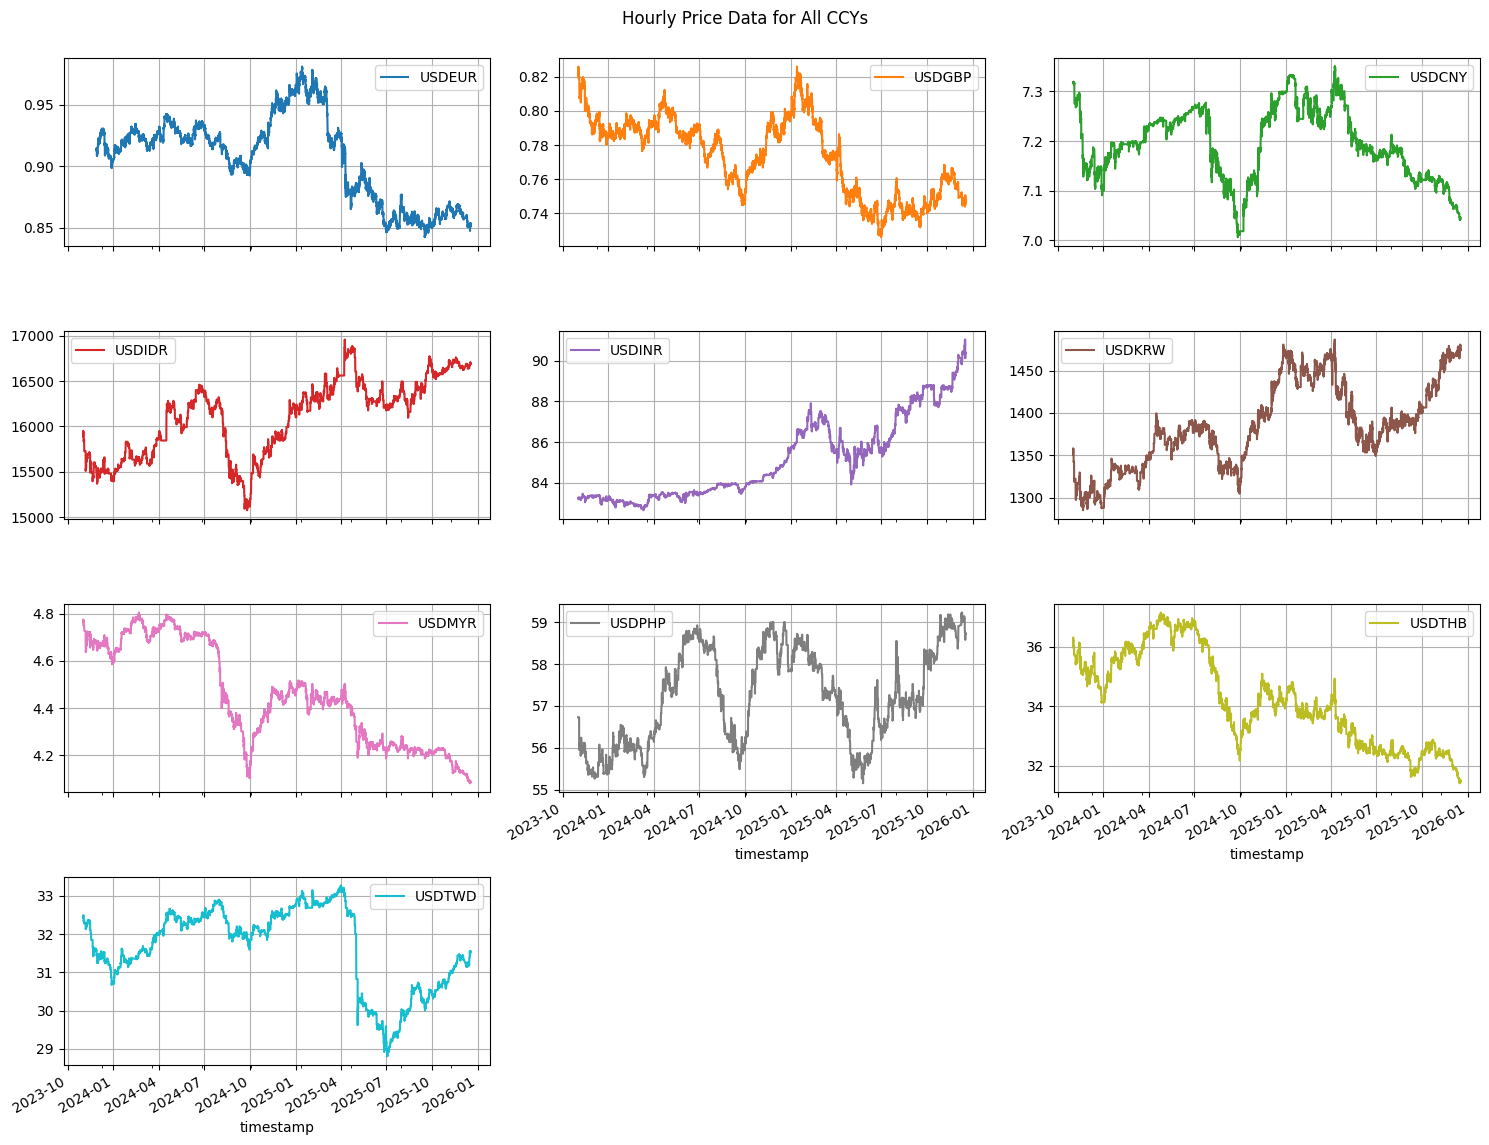

In [38]:
# plotting all ccys graphically

rebased_ccy_df.plot(
    subplots=True,
    layout=(4,3),
    figsize=(15,12),
    title='Hourly Price Data for All CCYs',
    grid=True,
    sharex=True
)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [39]:
# calculating log hourly returns

log_returns = np.log(rebased_ccy_df/rebased_ccy_df.shift(1))
log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18553 entries, 2023-11-01 00:00:00 to 2025-12-17 23:00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USDEUR  17911 non-null  float64
 1   USDGBP  18552 non-null  float64
 2   USDCNY  18552 non-null  float64
 3   USDIDR  18552 non-null  float64
 4   USDINR  18552 non-null  float64
 5   USDKRW  18552 non-null  float64
 6   USDMYR  18552 non-null  float64
 7   USDPHP  18552 non-null  float64
 8   USDTHB  18552 non-null  float64
 9   USDTWD  18552 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [40]:
# rolling window by hour

window = 24 * 5

asians = ['USDCNY', 'USDKRW', 'USDMYR', 'USDINR', 'USDIDR', 'USDPHP', 'USDTWD','USDTHB']
majors = ['USDEUR', 'USDGBP']

correlations = {}

for major in majors:
    for asian in asians:
        # calculate rolling correlation
        pair = f"{asian}_vs_{major}"
        correlations[pair] = log_returns[asian].rolling(window).corr(log_returns[major])

corr_df = pd.DataFrame(correlations)
corr_df.tail()

,USDCNY_vs_USDEUR,USDKRW_vs_USDEUR,USDMYR_vs_USDEUR,USDINR_vs_USDEUR,USDIDR_vs_USDEUR,USDPHP_vs_USDEUR,USDTWD_vs_USDEUR,USDTHB_vs_USDEUR,USDCNY_vs_USDGBP,USDKRW_vs_USDGBP,USDMYR_vs_USDGBP,USDINR_vs_USDGBP,USDIDR_vs_USDGBP,USDPHP_vs_USDGBP,USDTWD_vs_USDGBP,USDTHB_vs_USDGBP
timestamp,,,,,,,,,,,,,,,,
2025-12-17 19:00:00,0.304924,0.306113,0.149867,0.053099,0.114867,-0.009696,-0.032213,0.146506,0.155289,0.275621,0.057931,0.063844,-0.215796,0.267366,-0.050926,0.267961
2025-12-17 20:00:00,0.304541,0.306060,0.149686,0.053090,0.115147,-0.010042,-0.031756,0.146384,0.155898,0.275953,0.058204,0.063918,-0.216334,0.268033,-0.051519,0.268365
2025-12-17 21:00:00,0.304411,0.305186,0.149605,0.052939,0.114146,-0.009234,-0.032678,0.146183,0.155828,0.275934,0.058171,0.063914,-0.216279,0.267965,-0.051440,0.268335
2025-12-17 22:00:00,0.304411,0.305186,0.149605,0.052939,0.114146,-0.009234,-0.032678,0.146183,0.157179,0.276509,0.058785,0.064039,-0.217406,0.269364,-0.052840,0.269092
2025-12-17 23:00:00,0.304499,0.305192,0.149646,0.052940,0.114073,-0.009147,-0.032791,0.146210,0.156964,0.276449,0.058685,0.064026,-0.217239,0.269158,-0.052601,0.268999


In [41]:
# smooth out correlations to daily

daily_corr = corr_df.resample('d').mean()

# separate usdgbp and usdeur

usdeur_cols = [col for col in daily_corr.columns if 'USDEUR' in col]
usdgbp_cols = [col for col in daily_corr.columns if 'USDGBP' in col]

In [42]:
# for usdgbp

import plotly.express as px

# Filter just the data we want to plot
plot_data = daily_corr[usdgbp_cols].reset_index()

# Create interactive line chart
fig = px.line(plot_data, x='timestamp', y=usdgbp_cols,
              title='Daily Rolling Correlations vs USDGBP (Interactive - Zoom in!)',
              labels={'value': 'Correlation', 'variable': 'Currency Pair'})

# Customize: Add a range slider and highlight the 0 line
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True), # Adds a slider at the bottom
        type="date"
    ),
    yaxis=dict(range=[-1, 1]) # Fix y-axis to standard correlation limits
)

# Add a zero line to easily see when correlations flip negative
fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.show()

In [43]:
# correlation ag gbp

# 1. Create a Month column
daily_corr['Month'] = daily_corr.index.month

# 2. Group by Month and take the average (Aggregating all years together)
# This creates a "Typical Year" profile for each currency
seasonality_matrix = daily_corr.groupby('Month')[usdgbp_cols].mean().T

# 3. Plot Heatmap
fig = px.imshow(seasonality_matrix,
                labels=dict(x="Month of Year", y="Currency Pair", color="Avg Correlation"),
                x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                color_continuous_scale='RdBu', # Red=High Corr, Blue=Inverse/Low
                zmin=-0.5, zmax=0.8, # Lock scale to see contrast
                title="Seasonality Heatmap: Do correlations cool off in Nov/Dec?")

fig.show()

In [44]:
# correlation ag eur

# 1. Create a Month column
daily_corr['Month'] = daily_corr.index.month

# 2. Group by Month and take the average (Aggregating all years together)
# This creates a "Typical Year" profile for each currency
seasonality_matrix = daily_corr.groupby('Month')[usdeur_cols].mean().T

# 3. Plot Heatmap
fig = px.imshow(seasonality_matrix,
                labels=dict(x="Month of Year", y="Currency Pair", color="Avg Correlation"),
                x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                color_continuous_scale='RdBu', # Red=High Corr, Blue=Inverse/Low
                zmin=-0.5, zmax=0.8, # Lock scale to see contrast
                title="Seasonality Heatmap: Do correlations cool off in Nov/Dec?")

fig.show()

<Figure size 1000x800 with 0 Axes>

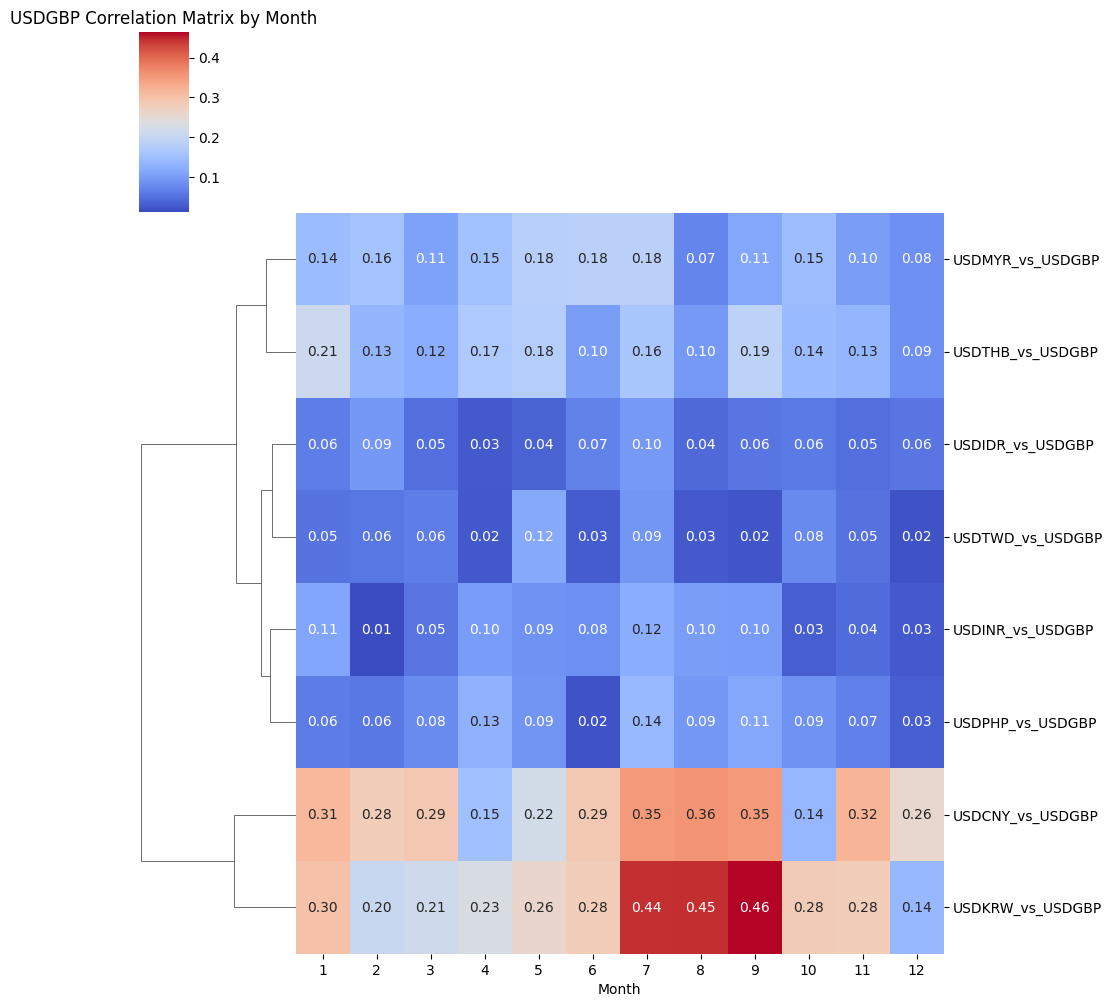

In [45]:
# plotting out correlation matrix

matrix = daily_corr.groupby('Month')[usdgbp_cols].mean().T

plt.figure(figsize=(10,8))
sns.clustermap(
    matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    col_cluster=False
)
plt.title('USDGBP Correlation Matrix by Month')
plt.show()

<Figure size 1000x800 with 0 Axes>

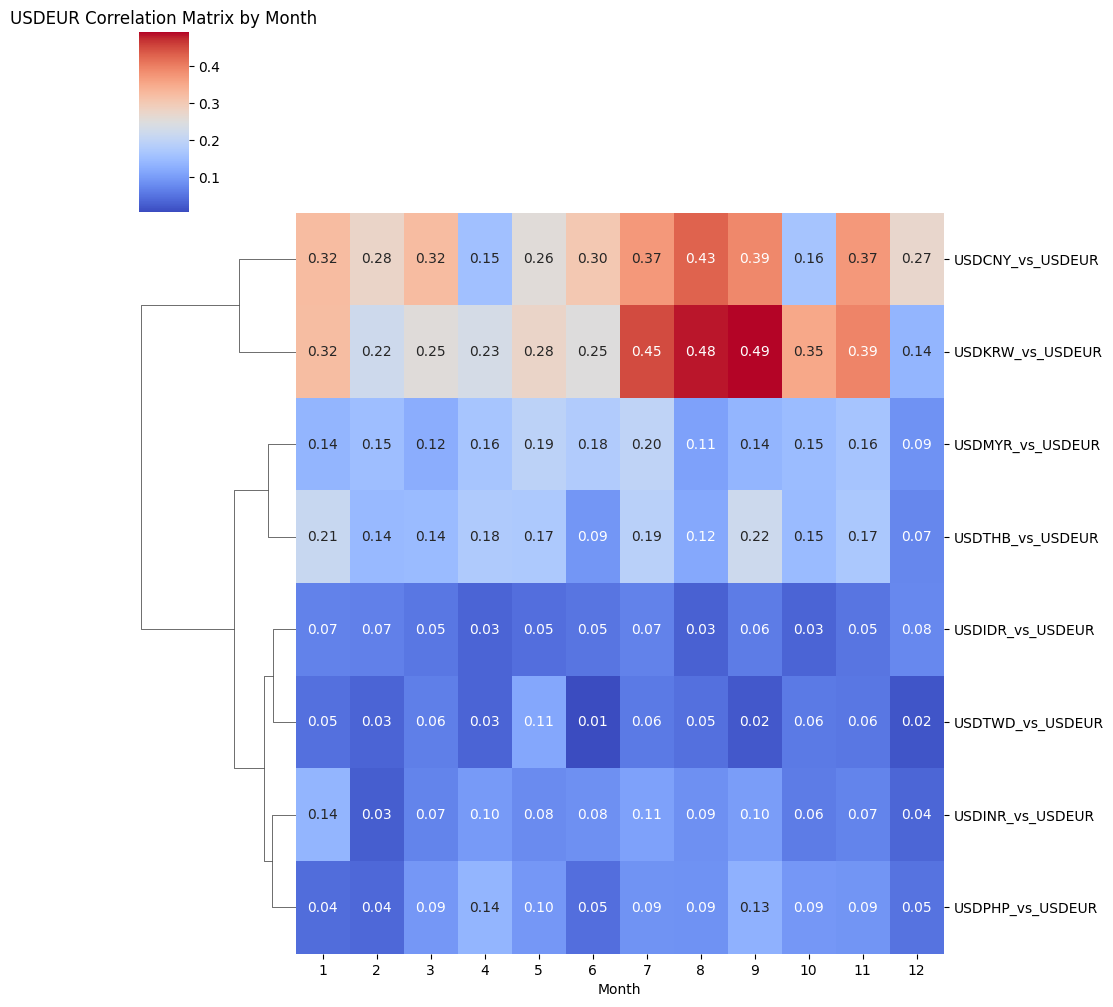

In [46]:
# plotting out correlation matrix

matrix = daily_corr.groupby('Month')[usdeur_cols].mean().T

plt.figure(figsize=(10,8))
sns.clustermap(
    matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    col_cluster=False
)
plt.title('USDEUR Correlation Matrix by Month')
plt.show()
